## 表 7.2

In [1]:
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6])
p = np.array([0.1, 0.1, 0.1, 0.1, 0.2, 0.4])
def expected_value(x,p):
  return x @ p #將這兩個陣列進行內積計算
expected_value(x,p)

4.4

In [2]:
import numpy as np
probs = np.array([0.6, 0.1, 0.1, 0.1, 0.1]) #所有可能的結果
outcomes = np.array([18, 21, 17, 17, 21]) #各結果發生的機率
expected_value = 0.0 #初始化期望值為0
for i in range(probs.shape[0]):
  expected_value += probs[i] * outcomes[i] #計算期望值
expected_value

18.4

In [3]:
expected_value = probs @ outcomes
expected_value

18.4

In [4]:
t0 = 18.4
T = lambda: t0 + np.random.randn(1)
T()

array([17.61457279])

# 程式 7.1: 建立離散機率分佈

<BarContainer object of 51 artists>

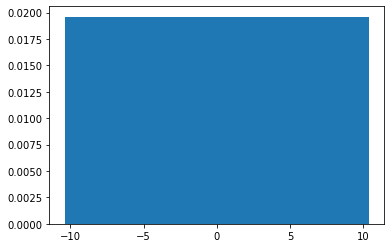

In [5]:
import torch
import numpy as np
from matplotlib import pyplot as plt

vmin,vmax = -10.,10. #設定支撐集的最小值與最大值
nsup = 51 #設定支撐集的元素數量
support = np.linspace(vmin,vmax,nsup) #support裡面的元素有51個，範圍介於-10到10之間，且元素間隔相等
probs = np.ones(nsup)
probs /= probs.sum()
z3 = torch.from_numpy(probs).float() #將機率分佈存在z3中
plt.bar(support,probs) #將分佈畫成長條圖

In [6]:
support

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

# 程式 7.2： 更新機率分佈

In [7]:
def update_dist(r,support,probs,lim=(-10.,10.),gamma=0.8):
  nsup = probs.shape[0] #取得支撐集的元素數量
  vmin,vmax = lim[0],lim[1] #取得支撐集內，元素值的上下限
  dz = (vmax-vmin)/(nsup-1.) #計算支撐集中，元素的間隔大小
  bj = np.round((r-vmin)/dz) #計算支撐集中，與回饋值對應的元素索引
  bj = int(np.clip(bj,0,nsup-1)) #將輸出索引限制在[0,nsup-1]的範圍內，並對其做進位處理
  m = probs.clone() #複製一份當前的機率分佈
  j = 1
  for i in range(bj,1,-1): #從左側的元素拿走一部分機率質量
    m[i] += np.power(gamma,j) * m[i-1]
    j += 1
  j = 1
  for i in range(bj,nsup-1,1): #從右側的元素拿走一部分機率質量
    m[i] += np.power(gamma,j) * m[i+1]
    j += 1
  m /= m.sum() #將m陣列中的機率進行常規化，確保所有機率質量相加後等於1
  return m

In [8]:
probs

array([0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.01960784, 0.01960784, 0.01960784, 0.01960784,
       0.01960784])

# 程式 7.3： 根據單一觀測結果重新分配機率質量

<BarContainer object of 51 artists>

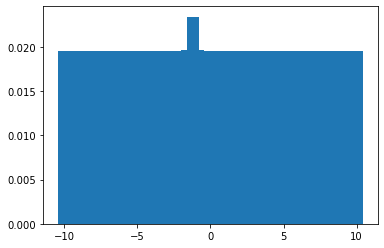

In [9]:
ob_reward = -1 #假設觀測到的回饋值為-1
Z = torch.from_numpy(probs).float()
Z = update_dist(ob_reward,torch.from_numpy(support).float(),Z,lim=(vmin,vmax),gamma=0.1) #更新機率分佈
plt.bar(support,Z)

# 程式 7.4： 根據一系列觀測結果重新分配機率質量

<BarContainer object of 51 artists>

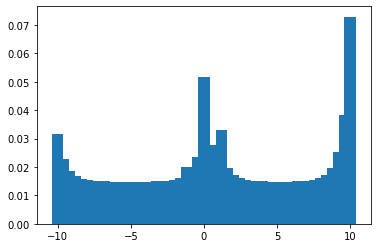

In [10]:
ob_rewards = [10,10,10,0,1,0,-10,-10,10,10] #假設一個回饋值序列
for i in range(len(ob_rewards)):
  Z = update_dist(ob_rewards[i], torch.from_numpy(support).float(), Z, lim=(vmin,vmax), gamma=0.5)
plt.bar(support, Z)

# 程式 7.5： 相同回饋值組成的序列

<BarContainer object of 51 artists>

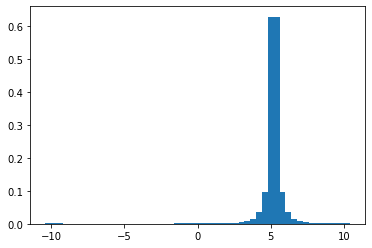

In [11]:
ob_rewards = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
for i in range(len(ob_rewards)):
  Z = update_dist(ob_rewards[i], torch.from_numpy(support).float(), Z, lim=(vmin,vmax), gamma=0.7) #根據回饋值序列中的值依序更新機率分佈
plt.bar(support, Z)

# 程式 7.6： 建構Dist-DQN模型

In [12]:
def dist_dqn(x,theta,aspace=3): #x是128個元素的狀態向量、theta是參數向量、aspace則是動作空間的大小
  dim0,dim1,dim2,dim3 = 128,100,25,51 #定義神經網路中不同層的維度，這樣才能將theta中的參數分到不同層的參數矩陣中
  t1 = dim0*dim1 #第一層網路參數矩陣的shape
  t2 = dim1*dim2 #第二層網路參數矩陣的shape
  theta1 = theta[0:t1].reshape(dim0,dim1) #將theta中[0:t1]的參數分配到第一層網路的參數矩陣中
  theta2 = theta[t1: t1+t2].reshape(dim1,dim2) #將theta中[t1:t1+t2]的參數分配到第二層網路的參數矩陣中
  l1 = x @ theta1 #輸入資料的shape是 B×128，theta1的shape是 128×100，因此l1(第1層網路）的shape為 B×100，其中B代表批次大小
  l1 = torch.selu(l1) #以scaled exponential linear units（SELUs）作為激活函數
  l2 = l1 @ theta2 #l1的shape是B×100，theta2的shape是100×25，因此l2（第2層網路）的shape為B×25
  l2 = torch.selu(l2) #以scaled exponential linear units（SELUs）作為激活函數
  l3 = []
  for i in range(aspace): #利用迴圈走訪每一個動作，並產生各動作的價值分佈
    step = dim2*dim3
    theta5_dim = t1 + t2 + i * step
    theta5 = theta[theta5_dim:theta5_dim+step].reshape(dim2,dim3) #將參數分配到不同動作的參數矩陣中
    l3_ = l2 @ theta5 #l2的shape是B×25，theta5的shape是25×51，因此該計算結果的shape為B×51
    l3.append(l3_)
  l3 = torch.stack(l3,dim=1) #最後一層網路的shape為B×3×51
  l3 = torch.nn.functional.softmax(l3,dim=2)
  return l3.squeeze()

# 程式 7.7: 計算目標分佈

In [13]:
def get_target_dist(dist_batch,action_batch,reward_batch,support,lim=(-10,10),gamma=0.8):
  nsup = support.shape[0] #支撐集的元素數量
  vmin,vmax = lim[0],lim[1]
  dz = (vmax-vmin)/(nsup-1.)
  target_dist_batch = dist_batch.clone()
  for i in range(dist_batch.shape[0]): #用迴圈走訪整個批次
    dist_full = dist_batch[i]
    action = int(action_batch[i].item())
    dist = dist_full[action]
    r = reward_batch[i]
    if r != -1: #若回饋值不是 -1，代表已經達到最終狀態，目標分佈為退化分佈（所有機率質量集中在回饋值的位置）
      target_dist = torch.zeros(nsup)
      bj = np.round((r-vmin)/dz)
      bj = int(np.clip(bj,0,nsup-1))
      target_dist[bj] = 1.
    else: #若目前狀態非最終狀態，則根據回饋值，以貝氏方法更新先驗分佈
      target_dist = update_dist(r,support,dist,lim=lim,gamma=gamma)
    target_dist_batch[i,action,:] = target_dist #只變更與執行動作有關的分佈
  return target_dist_batch

# 表 7.4

In [14]:
p = np.array([0.1,0.1])
q = np.array([0.6,0.5])
def lr(p,q):
  return np.prod(p/q) #計算個別元素的概度比，再把結果相乘

# 表 7.5

In [15]:
p = np.array([0.1,0.1])
q = np.array([0.6,0.5])
def lr(p,q):
  return np.sum(np.log(p/q))

# 表 7.6

In [16]:
p = np.array([0.1,0.1])
q = np.array([0.6,0.5])
def lr(p,q):
  x = q * np.log(p/q)
  x = np.sum(x)
  return x

# 表 7.7

In [17]:
p = np.array([0.1,0.1])
q = np.array([0.6,0.5])
def lr(p,q):
  x = q * np.log(p/q)
  x = -1 * np.sum(x)
  return x

# 程式 7.8：交叉熵損失函數

In [18]:
def lossfn(x,y):#計算預測分佈x和目標分佈y之間的損失
  loss = torch.Tensor([0.])
  loss.requires_grad=True
  for i in range(x.shape[0]): #走訪批次中的每個元素
    loss_ = -1 *  torch.log(x[i].flatten(start_dim=0)) @ y[i].flatten(start_dim=0) #將個別資料的損失存放進一個陣列中
    loss = loss + loss_ #將損失陣列中的元素加總，得到該批次的損失值
  return loss

# 程式 7.9： 使用模擬資料進行測試

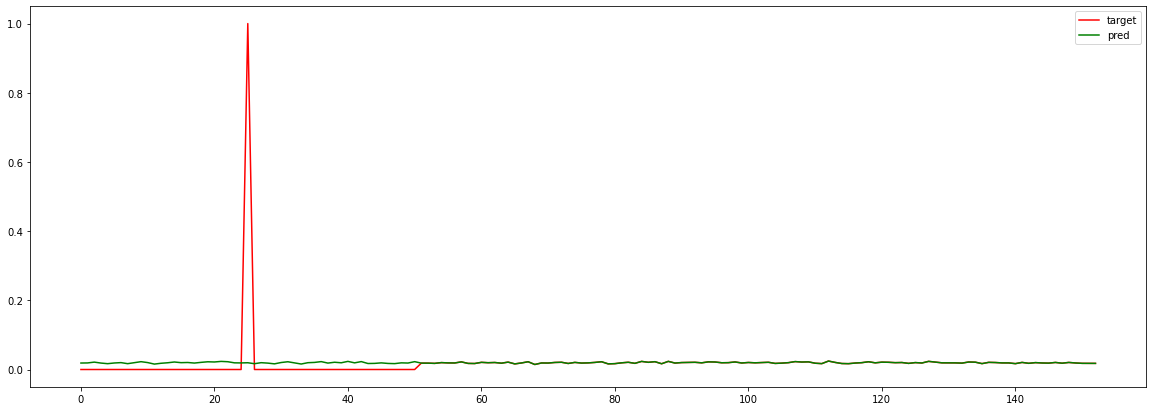

In [19]:
aspace = 3 #將動作空間的大小設為3
tot_params = 128*100 + 25*100 + aspace*25*51 #根據神經層大小來定義參數總數
theta = torch.randn(tot_params)/10. #隨機生成Dist-DQN的初始參數向量
theta.requires_grad=True
theta_2 = theta.detach().clone() #複製theta，將其用於目標網路
vmin,vmax= -10,10
gamma=0.9
lr = 0.00001
update_rate = 75 #每隔75步同步一次主要和目標Dist-DQN網路
support = torch.linspace(-10,10,51)
state = torch.randn(2,128)/10. #隨機產生兩個測試用的初始狀態
action_batch = torch.Tensor([0,2]) #生成動作資料
reward_batch = torch.Tensor([0,8]) #生成回饋值資料
losses = [] 
pred_batch = dist_dqn(state,theta,aspace=aspace) #初始化預測分佈的批次
target_dist = get_target_dist(pred_batch,action_batch,reward_batch, support, lim=(vmin,vmax),gamma=gamma) #初始化目標分佈的批次

plt.figure(figsize=(20,7))
plt.plot((target_dist.flatten(start_dim=1)[0].data.numpy()),color='red',label='target')
plt.plot((pred_batch.flatten(start_dim=1)[0].data.numpy()),color='green',label='pred')
plt.legend()

# 程式 7.10： 使用合成資料訓練Dist-DQN

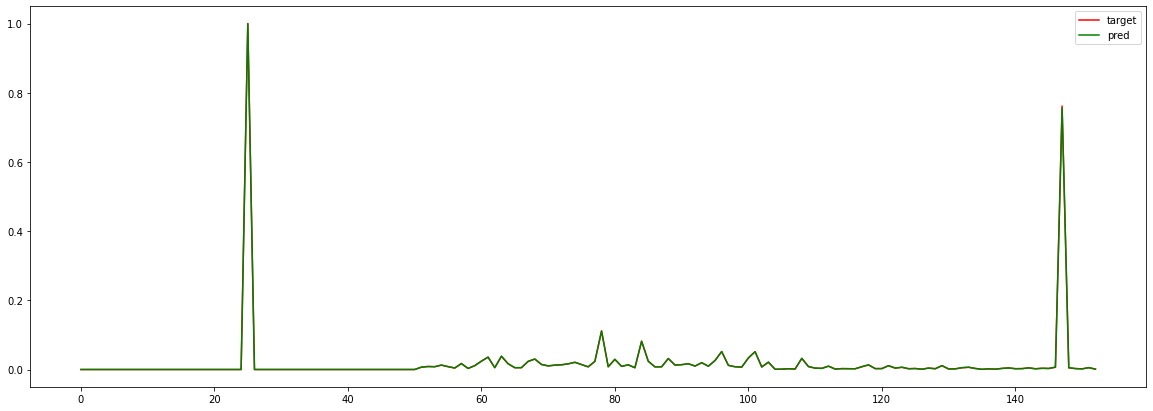

In [20]:
for i in range(1000):
  reward_batch = torch.Tensor([0,8]) + torch.randn(2)/10.0 #在回饋值批次中加入雜訊，避免過度配適
  pred_batch = dist_dqn(state,theta,aspace=aspace) #使用主要Dist-DQN模型產生預測分佈
  pred_batch2 = dist_dqn(state,theta_2,aspace=aspace) #使用目標Dist-DQN網路產生預測分佈
  target_dist = get_target_dist(pred_batch2,action_batch,reward_batch, support, lim=(vmin,vmax),gamma=gamma) #利用目標網路所產生的分佈來建立訓練用的目標分佈
  loss = lossfn(pred_batch,target_dist.detach()) #將主模型的預測分佈代入損失函數中
  losses.append(loss.item())
  loss.backward()
  # 手動執行梯度下降
  with torch.no_grad():
    theta -= lr * theta.grad
  theta.requires_grad = True
  
  if i % update_rate == 0: #{2}讓目標網路的參數與主網路參數同步
    theta_2 = theta.clone() 

plt.figure(figsize=(20,7))
plt.plot((target_dist.flatten(start_dim=1)[0].data.numpy()),color='red',label='target')
plt.plot((pred_batch.flatten(start_dim=1)[0].data.numpy()),color='green',label='pred')
plt.legend()

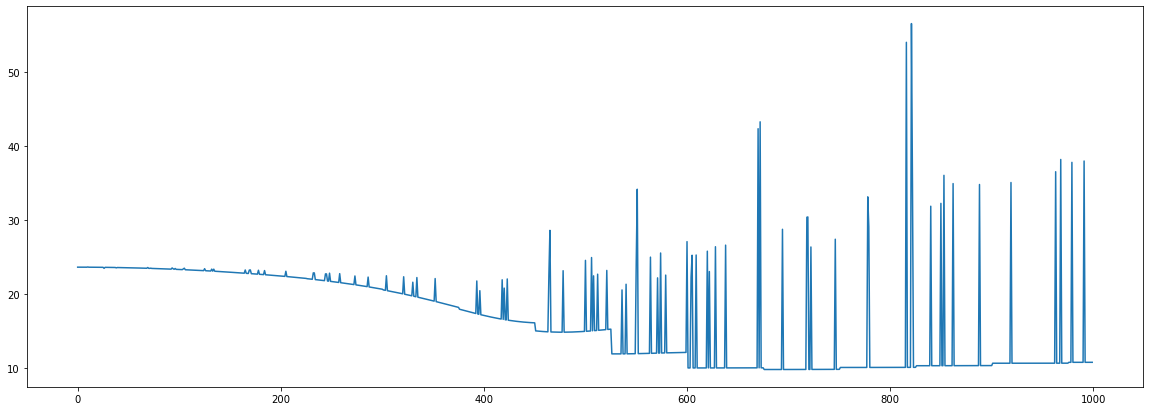

In [21]:
plt.figure(figsize=(20,7))
plt.plot(losses)

# 程式 7.11： 視覺化呈現模型所學到的動作價值分佈

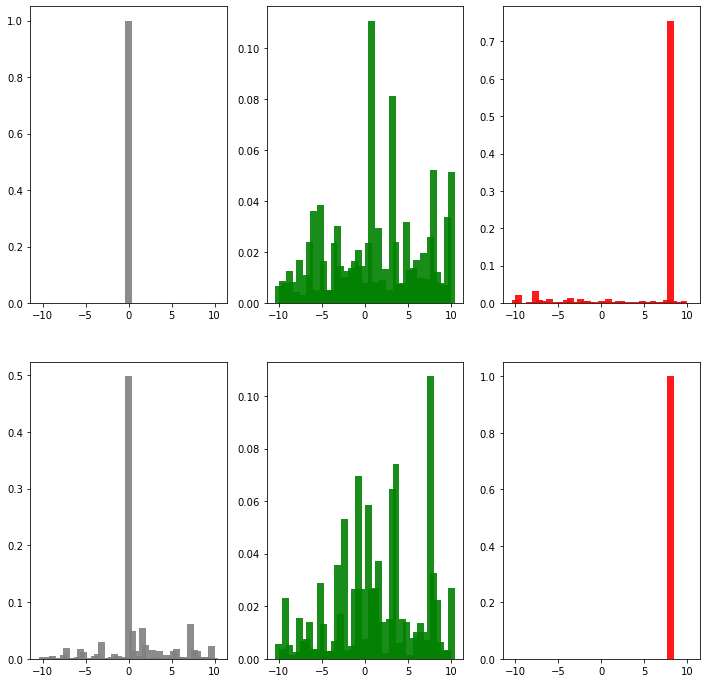

In [22]:
tpred = pred_batch
cs = ['gray','green','red']
num_batch = 2
labels = ['Action {}'.format(i,) for i in range(aspace)]
fig,ax = plt.subplots(nrows=num_batch,ncols=aspace,figsize=(12,12))
for j in range(num_batch): #以迴圈走訪批次中的每一筆訓練資料
  for i in range(tpred.shape[1]): #以迴圈走訪每一種動作
    ax[j,i].bar(support.data.numpy(),tpred[j,i,:].data.numpy(),label='Action {}'.format(i),alpha=0.9,color=cs[i])

# 程式 7.12： 對狀態資料進行預處理，並決定選擇動作的策略

In [23]:
def preproc_state(state): #資料預處理函式
  p_state = torch.from_numpy(state).unsqueeze(dim=0).float()
  p_state = torch.nn.functional.normalize(p_state,dim=1) #將狀態中的數值正規化至0和1之間
  return p_state

def get_action(dist,support): #動作選擇策略函式
  actions = []
  for b in range(dist.shape[0]): #以迴圈走訪批次中分佈維度上的資料
    expectations = [support @ dist[b,a,:] for a in range(dist.shape[1])] #計算每個動作價值分佈的期望值
    action = int(np.argmax(expectations)) #計算出擁有最高期望值的動作
    actions.append(action)
  actions = torch.Tensor(actions).int()
  return actions

In [24]:
pip install gym[atari]

Note: you may need to restart the kernel to use updated packages.


# 程式 7.13： 為Freeway遊戲做準備

In [25]:
import gym
from collections import deque
env = gym.make('Freeway-ram-v0')
aspace = 3

vmin,vmax = -10,10
replay_size = 200
batch_size = 50
nsup = 51
dz = (vmax - vmin) / (nsup-1)
support = torch.linspace(vmin,vmax,nsup)

replay = deque(maxlen=replay_size) #利用deque資料結構建立經驗池
lr = 0.0001 #學習率
gamma = 0.1 #折扣係數
epochs = 1300
eps = 0.20 #ε—貪婪策略中的初始ε值
eps_min = 0.05 # ε的最小值
priority_level = 5 #優先回放：將回放中的重要經驗複製5次
update_freq = 25 #每隔25步同步一次目標網路

#初始化DQN參數向量
tot_params = 128*100 + 25*100 + aspace*25*51  #Dist-DQN的總參數數量
theta = torch.randn(tot_params)/10. #隨機產生Dist-DQN的初始參數
theta.requires_grad=True
theta_2 = theta.detach().clone() #初始化目標網路的參數

losses = []
cum_rewards = [] #每次贏得遊戲（成功越過公路）便在串列中記錄1
renders = []
state = preproc_state(env.reset())

# 程式 7.14：主要訓練迴圈

In [26]:
from random import shuffle
for i in range(epochs):
  pred = dist_dqn(state,theta,aspace=aspace)
  if i < replay_size or np.random.rand(1) < eps: #ε—貪婪動作選擇
    action = np.random.randint(aspace)
  else:
    action = get_action(pred.unsqueeze(dim=0).detach(),support).item()
  state2, reward, done, info = env.step(action) #在環境中執行選擇的動作
  state2 = preproc_state(state2)
    
  if reward == 1: cum_rewards.append(1)
  reward = 10 if reward == 1 else reward #若成功穿越公路，將回饋值改成+10
  reward = -10 if done else reward #若遊戲以失敗告終（很長一段時間過後，仍未穿越公路），則將回饋值改為 -10
  reward = -1 if reward == 0 else reward #將環境產生的回饋值0（遊戲尚未有結果）修改成 -1，藉此懲罰演算法執行了沒有結果的動作
  exp = (state,action,reward,state2) #將得到的資訊打包成tuple的資料型態，做為訓練資料
  replay.append(exp) #將訓練資料加入經驗中
  
  if reward == 10: #若回饋值為10，代表該資料是重要的，要複製5份到緩衝區
    for e in range(priority_level):
      replay.append(exp)          
  shuffle(replay)
  state = state2

  if len(replay) == replay_size: #當經驗池放滿資料後，開始進行訓練
    indx = np.random.randint(low=0,high=len(replay),size=batch_size) 
    exps = [replay[j] for j in indx]
    state_batch = torch.stack([ex[0] for ex in exps],dim=1).squeeze()
    action_batch = torch.Tensor([ex[1] for ex in exps])
    reward_batch = torch.Tensor([ex[2] for ex in exps])
    state2_batch = torch.stack([ex[3] for ex in exps],dim=1).squeeze()
    pred_batch = dist_dqn(state_batch.detach(),theta,aspace=aspace)
    pred2_batch = dist_dqn(state2_batch.detach(),theta_2,aspace=aspace)
    target_dist = get_target_dist(pred2_batch,action_batch,reward_batch, support, lim=(vmin,vmax),gamma=gamma)
    loss = lossfn(pred_batch,target_dist.detach()) 
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad(): #梯度下降
      theta -= lr * theta.grad
    theta.requires_grad = True
      
  if i % update_freq == 0: #同步目標網路與主模型的參數
    theta_2 = theta.detach().clone()
      
  if i > 100 and eps > eps_min: #ε會隨著訓練次數的增加而下降，除非已達到最小值
    dec = 1./np.log2(i)
    dec /= 1e3
    eps -= dec
  
  if done: #當遊戲結束時，重置遊戲環境
    state = preproc_state(env.reset())
    done = False

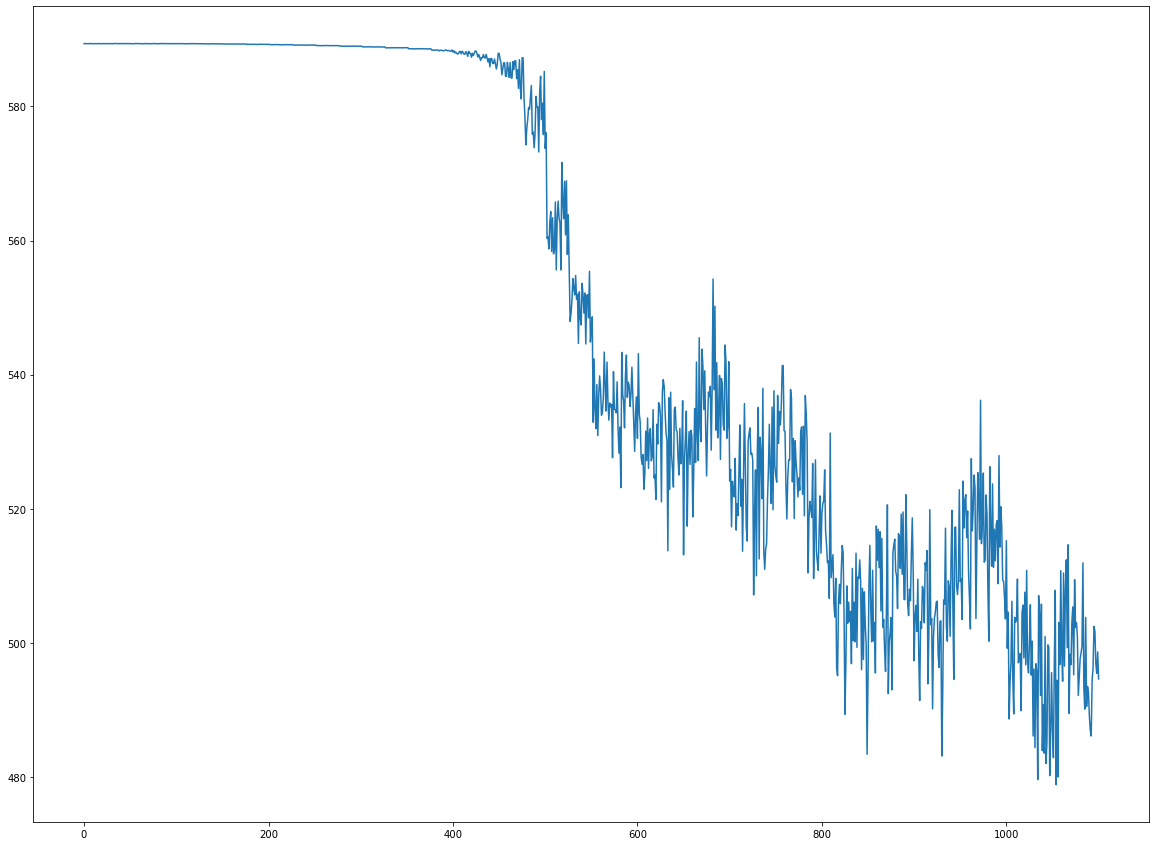

In [27]:
plt.figure(figsize=(20,15))
plt.plot(losses)